In [ ]:
# Calculates averaged over angle annihilation cross section of the scalar singlet DM required in 
# eq.(38) in 1706.07433

In [2]:
import os
import glob
import numpy as np
import matplotlib as mlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.interpolate as inter
from numpy import genfromtxt

In [3]:
# Constants from 1706.07433

mh=125.09
v0=246.2

In [10]:
font = {
        'weight' : 'normal',
        'size'   : 22}
mlib.rc('font', **font)


In [11]:
# s as a function of momenta p,q & cth=cos(theta(p,q))
def ss(m,p,q,cth):
    return 2*m**2+2*(np.sqrt(p**2+m**2)*np.sqrt(q**2+m**2)-p*q*cth)

def wInv(ls, mh, ms):
    return (ls**2*v0**2*np.sqrt(1-4*ms**2/mh**2))/(32*np.pi*mh)

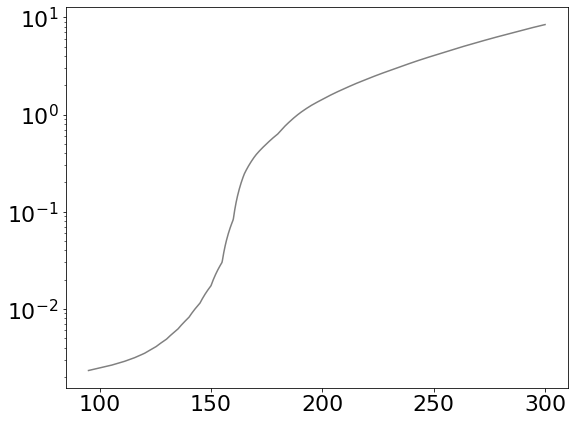

In [14]:
#Interpolating width from Table 28 in https://arxiv.org/pdf/1101.0593.pdf8 (below 300 GeV)

WidthData=np.genfromtxt("Gamma_from_s.dat", dtype=np.float64, delimiter="\t", comments="#")
WidthDataInterp = inter.InterpolatedUnivariateSpline(WidthData[:,0],WidthData[:,1], k=1)
m = np.linspace(WidthData[1,0],WidthData[-1,0],1000)

plt.figure(figsize=(9, 7))
ax = plt.gca()

plt.plot(m,WidthDataInterp(m), c="grey",linestyle='-')
ax.set_yscale("log")

In [25]:
# Calculating cross section for momenta p,q

    
ls=2*10**(-4)
mm=np.array([62.5])
pp = np.logspace(10**(-6),50,1000)
qq = np.logspace(10**(-6),50,1000)

with open("Tables/pt_{}.csv".format(m),"w") as fout:
        np.savetxt(fout, pp, fmt="%e", delimiter=',')
        
for m in mm:

    open("Tables/sv_{}.csv".format(m),"w")

    with open("Tables/sv_{}.csv".format(m),"a") as fout:
        np.savetxt(fout, [np.insert(pp,0,0)], fmt="%e", delimiter='\t')

        for p in pp:
            svlist=[]
            for q in qq:
                a=ss(m,p,q,-1)
                b=ss(m,p,q,1)
                s=np.linspace(b,a,1000)

                if (m <= mh/2):
                    I=np.trapz((np.sqrt(s)*WidthDataInterp(s))/((s-mh**2)**2+mh**2*\
                                    (WidthDataInterp(s)+wInv(ls,mh,m))**2),s)/(2*p*q)

                else:
                    I=np.trapz((np.sqrt(s)*WidthDataInterp(s))/((s-mh**2)**2+mh**2*WidthDataInterp(s)**2),s)\
                    /(2*p*q)

                sv= (ls**2*v0**2*I)/(2*np.sqrt(p**2+m**2)*np.sqrt(q**2+m**2))
                #print(sv)

                svlist.append(sv)
            #print(svlist)

            np.savetxt(fout, [np.insert(np.array(svlist),0,p)], fmt="%e", delimiter='\t')